In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data=pd.read_csv('Train.csv')

In [12]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,12,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,0,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,0,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,0,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,0,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,0,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,0,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,0,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,6,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


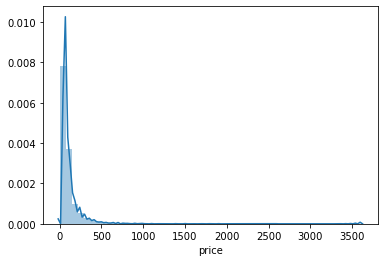

In [3]:
sns.distplot(data['price'])

In [4]:
data.corr()

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


In [5]:
#cleaning data


In [44]:
data['price']=data['price'].apply(lambda x:float(x))

In [6]:
data['availability']=data['availability'].apply(lambda x:x[3:6])

In [7]:
data['availability']

0        Dec
1        dy 
2        dy 
3        dy 
4        dy 
        ... 
13315    dy 
13316    dy 
13317    dy 
13318    Jun
13319    dy 
Name: availability, Length: 13320, dtype: object

In [8]:
data['availability'].unique()

array(['Dec', 'dy ', 'May', 'Feb', 'Nov', 'Oct', 'Sep', 'Mar', 'Apr',
       'Aug', 'Jun', 'Jan', 'Jul', 'edi'], dtype=object)

In [9]:
data['availability']=data['availability'].map({'Dec':12, 'dy ':0, 'May':5, 'Feb':2, 'Nov':11, 'Oct':10, 'Sep':9, 'Mar':3, 'Apr':4,
       'Aug':8, 'Jun':6, 'Jan':1, 'Jul':7, 'edi':0})

In [10]:
data['availability']

0        12
1         0
2         0
3         0
4         0
         ..
13315     0
13316     0
13317     0
13318     6
13319     0
Name: availability, Length: 13320, dtype: int64

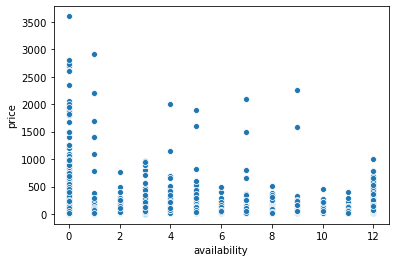

In [50]:
sns.scatterplot(data['availability'],data['price'])

In [16]:
data['size']=data['size'].apply(lambda x:str(x)[0:2])

In [23]:
data[data['size']=='na']='3'

In [24]:
data['size'].unique()

array(['2 ', '4 ', '3 ', '6 ', '1 ', '8 ', '7 ', '5 ', '11', '9 ', '3',
       '27', '10', '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [26]:
data['size']=data['size'].apply(lambda x:float(x))

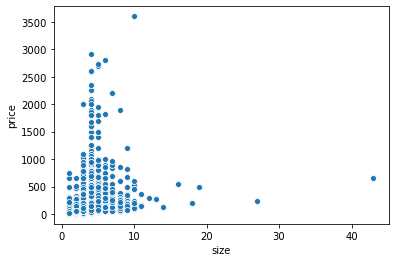

In [51]:
sns.scatterplot(data['size'],data['price'])

In [52]:
data['price'].mean()

112.45040503002991

In [53]:
data.describe()

,size,price
count,13320.000000,13320.000000
mean,2.803979,112.450405
std,1.294214,148.947256
min,1.000000,3.000000
25%,2.000000,50.000000
50%,3.000000,72.000000
75%,3.000000,120.000000
max,43.000000,3600.000000


In [54]:
data['bath']=data['bath'].apply(lambda x:float(x))
data['balcony']=data['balcony'].apply(lambda x:float(x))

In [55]:
data.describe()

,size,bath,balcony,price
count,13320.000000,13263.000000,12727.000000,13320.000000
mean,2.803979,2.692980,1.586155,112.450405
std,1.294214,1.340691,0.818289,148.947256
min,1.000000,1.000000,0.000000,3.000000
25%,2.000000,2.000000,1.000000,50.000000
50%,3.000000,2.000000,2.000000,72.000000
75%,3.000000,3.000000,2.000000,120.000000
max,43.000000,40.000000,3.000000,3600.000000


In [56]:
data['bath'].isnull().sum()

57

In [57]:
data['balcony'].isnull().sum()

593

filling median values for  both varaibles

In [58]:
data['bath'].fillna(3.0,inplace=True)
data['balcony'].fillna(2.0,inplace=True)

In [63]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,12,Electronic City Phase II,2.0,Coomee,1056,2.0,1.0,39.07
1,Plot Area,0,Chikka Tirupathi,4.0,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,0,Uttarahalli,3.0,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,0,Lingadheeranahalli,3.0,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,0,Kothanur,2.0,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,0,Whitefield,5.0,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,0,Richards Town,4.0,NaN,3600,5.0,2.0,400.00
13317,Built-up Area,0,Raja Rajeshwari Nagar,2.0,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,6,Padmanabhanagar,4.0,SollyCl,4689,4.0,1.0,488.00


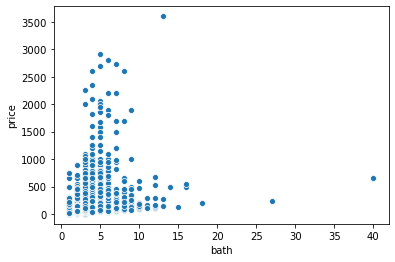

In [64]:
sns.scatterplot(data['bath'],data['price'])

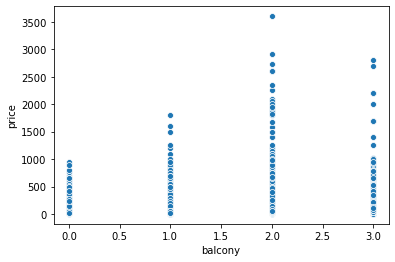

In [65]:
sns.scatterplot(data['balcony'],data['price'])

In [67]:
data['location'].nunique()

1305

In [69]:
data['location'].value_counts()

Whitefield                            539
Sarjapur  Road                        397
Electronic City                       302
Kanakpura Road                        273
Thanisandra                           234
                                     ... 
Arasanakunte                            1
 ittamadu                               1
Fraser town                             1
Kudlu Village,                          1
Kengeri Satellite Town ( BDA SITE)      1
Name: location, Length: 1305, dtype: int64

In [70]:
data['location'].fillna('unknown',inplace=True)

In [71]:
data['society'].fillna('unknown',inplace=True)

In [72]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,12,Electronic City Phase II,2.0,Coomee,1056,2.0,1.0,39.07
1,Plot Area,0,Chikka Tirupathi,4.0,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,0,Uttarahalli,3.0,unknown,1440,2.0,3.0,62.00
3,Super built-up Area,0,Lingadheeranahalli,3.0,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,0,Kothanur,2.0,unknown,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,0,Whitefield,5.0,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,0,Richards Town,4.0,unknown,3600,5.0,2.0,400.00
13317,Built-up Area,0,Raja Rajeshwari Nagar,2.0,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,6,Padmanabhanagar,4.0,SollyCl,4689,4.0,1.0,488.00


In [73]:
data['total_sqft']

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13320, dtype: object

In [91]:
#most values are 4 digit
(data['total_sqft'].apply(lambda x:len(x))>4).sum()

353

In [97]:
data['total_sqft']=data['total_sqft'].apply(lambda x:x[0:4])

In [124]:
alphanum=1-data['total_sqft'].apply(lambda x:x.isdecimal())

In [125]:
type(alphanum)

pandas.core.series.Series

In [136]:
alphanum.sum()

104

In [137]:
#indices all not decimal total_sqft values
alpha_index=alphanum[alphanum==1].index

In [139]:
data.iloc[alpha_index]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
410,Super built-up Area,0,Kengeri,1.0,unknown,34.4,1.0,0.0,18.500
886,Super built-up Area,6,Chandapura,1.0,SuVue S,520,1.0,0.0,15.135
959,Super built-up Area,0,Kammasandra,1.0,Puitea,650,1.0,0.0,18.410
990,Super built-up Area,0,Sarjapur,1.0,DSousyl,633,1.0,0.0,17.535
1019,Plot Area,3,Marathi Layout,1.0,unknown,5.31,1.0,0.0,110.000
1086,Plot Area,3,Narasapura,2.0,unknown,30Ac,2.0,2.0,29.500
1183,Super built-up Area,8,Magadi Road,2.0,Vrenty,884,2.0,0.0,46.500
1187,Super built-up Area,3,Thanisandra,2.0,SLityee,850,2.0,0.0,36.435
1400,Super built-up Area,0,Chamrajpet,9.0,unknown,716S,9.0,1.0,296.000
1484,Carpet Area,3,Hebbal,2.0,Arcia S,547.,2.0,0.0,42.720


In [122]:
data_checkpoint=data

In [141]:
data.drop(alpha_index,inplace=True)

In [143]:
data['total_sqft']=data['total_sqft'].apply(lambda x:float(x))

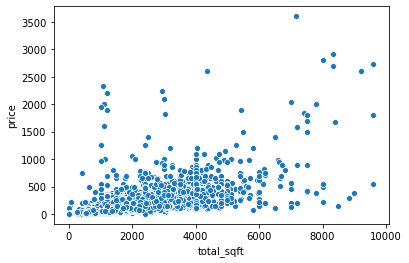

In [144]:
sns.scatterplot(data['total_sqft'],data['price'])

In [158]:
data.corr()

,size,total_sqft,bath,balcony,price
size,1.000000,0.447026,0.896546,0.186186,0.396455
total_sqft,0.447026,1.000000,0.518474,0.206649,0.662858
bath,0.896546,0.518474,1.000000,0.202466,0.454231
balcony,0.186186,0.206649,0.202466,1.000000,0.119713
price,0.396455,0.662858,0.454231,0.119713,1.000000


#data is clean now

In [150]:
from scipy import stats

In [155]:
z=np.abs(stats.zscore(data[['size', 'total_sqft', 'bath', 'balcony', 'price']]))

In [160]:
z

array([[0.62805965, 0.55976269, 0.52391019, 0.7674049 , 0.49350652],
       [0.92038478, 1.27978423, 1.72122505, 1.73710754, 0.04860835],
       [0.14616256, 0.10225879, 0.52391019, 1.73710754, 0.33990843],
       ...,
       [0.62805965, 0.4584923 , 0.52391019, 0.7674049 , 0.35330556],
       [0.92038478, 3.76865309, 0.97284663, 0.7674049 , 2.51368029],
       [1.40228187, 1.16261939, 1.2722886 , 0.7674049 , 0.64134385]])

In [161]:
data_cp2=data

In [162]:
data=data[(z < 3).all(axis=1)]

In [165]:
#outliers removed 

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12588 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12588 non-null  object 
 1   availability  12588 non-null  object 
 2   location      12588 non-null  object 
 3   size          12588 non-null  float64
 4   society       12588 non-null  object 
 5   total_sqft    12588 non-null  float64
 6   bath          12588 non-null  float64
 7   balcony       12588 non-null  float64
 8   price         12588 non-null  float64
dtypes: float64(5), object(4)
memory usage: 983.4+ KB


In [168]:
data_dummy=pd.get_dummies(data,prefix_sep="@",columns=['area_type','location','society'])

In [169]:
data_dummy

,availability,size,total_sqft,bath,balcony,price,area_type@3,area_type@Built-up Area,area_type@Carpet Area,area_type@Plot Area,...,society@YCnce R,society@YMhenLi,society@Yaenti,society@ZeodsWo,society@Zonce E,society@Zostaa,society@i1ncyRe,society@i1odsne,society@i1rtsCo,society@unknown
0,12,2.0,1056.0,2.0,1.0,39.07,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,4.0,2600.0,5.0,3.0,120.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,3.0,1440.0,2.0,3.0,62.00,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,3.0,1521.0,3.0,1.0,95.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2.0,1200.0,2.0,1.0,51.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13314,0,3.0,1715.0,3.0,3.0,112.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13315,0,5.0,3453.0,4.0,0.0,231.00,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13316,0,4.0,3600.0,5.0,2.0,400.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13317,0,2.0,1141.0,2.0,1.0,60.00,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
X=data_dummy.drop('price',axis=1)
y=pd.Series(data_dummy['price'])

In [ ]:
#train test split

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [174]:
#trying decison tress regression without normalization

# decision tree

In [175]:
from sklearn.tree import DecisionTreeRegressor

In [176]:
dreg=DecisionTreeRegressor()

In [177]:
dreg.fit(X_train,y_train)

DecisionTreeRegressor()

In [181]:
pred=dreg.predict(X_test)

In [180]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [182]:
mean_absolute_error(y_test,pred)

24.29435167043224

In [184]:
np.sqrt(mean_squared_error(y_test,pred))

47.329837577575454

In [198]:
r2_score(y_test,pred)

0.6251016599033623

# Random forest

In [185]:
from sklearn.ensemble import RandomForestRegressor

In [190]:
rfr=RandomForestRegressor(n_estimators=100)

In [191]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [193]:
pred1=rfr.predict(X_test)

In [194]:
mean_absolute_error(y_test,pred1)

20.913866944223322

In [195]:
np.sqrt(mean_squared_error(y_test,pred1))

40.23407056011276

In [196]:
from sklearn.metrics import r2_score

In [197]:
r2_score(y_test,pred1)

0.7290860079987866

In [199]:
residuals=y_test-pred1

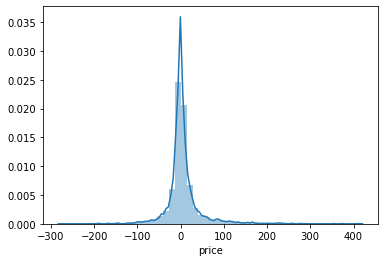

In [200]:
sns.distplot(residuals)

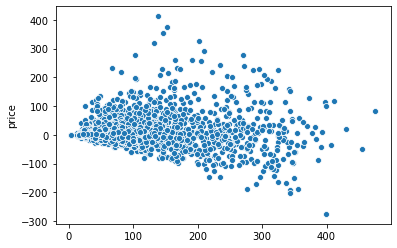

In [280]:
sns.scatterplot(pred1,residuals)

# Using MLR

In [205]:
from sklearn.preprocessing import StandardScaler

In [206]:
scaler= StandardScaler()

In [209]:
X_train_scaled=scaler.fit_transform(X_train)

In [208]:
from sklearn.linear_model import LinearRegression

In [210]:
lr=LinearRegression()

In [211]:
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [212]:
X_test_scaled=scaler.transform(X_test)

In [217]:
X_test_scaled

array([[-0.45216989,  0.37889149,  0.35420453, ..., -0.01089017,
        -0.01089017,  1.23576704],
       [-0.45216989, -0.72786013,  0.07740545, ..., -0.01089017,
        -0.01089017, -0.80921401],
       [-0.45216989, -0.72786013, -0.40823605, ..., -0.01089017,
        -0.01089017, -0.80921401],
       ...,
       [ 1.59696575, -0.72786013, -0.37508646, ..., -0.01089017,
        -0.01089017, -0.80921401],
       [-0.45216989, -0.72786013, -1.87179047, ..., -0.01089017,
        -0.01089017,  1.23576704],
       [-0.45216989,  0.37889149,  0.38238169, ..., -0.01089017,
        -0.01089017, -0.80921401]])

In [213]:
lr_pred=lr.predict(X_test_scaled)

In [220]:
lr_pred

array([7.88023072e+14, 1.24911861e+02, 9.46441239e+13, ...,
       2.85368606e+01, 6.24188154e+01, 8.80681106e+01])

In [221]:
r2_score(y_test,lr_pred)

-8.17977277308257e+26

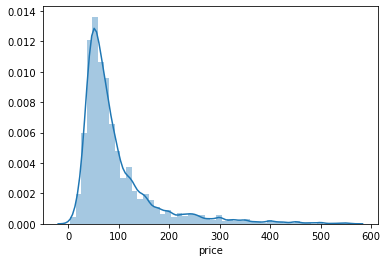

In [230]:
sns.distplot(y_train)

# using box cox trsnformation on y_train

In [235]:
from sklearn.preprocessing import power_transform

In [242]:
y_train_scaled=power_transform(np.array(y_train).reshape(8433,1), method='box-cox', standardize=True, copy=True)

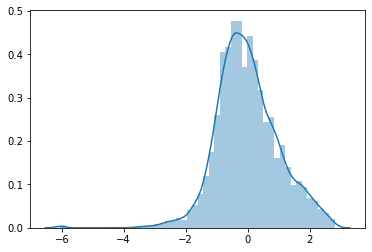

In [245]:
sns.distplot(y_train_scaled)

# using random forest on scaled y box cox

In [246]:
rfr_scaled=RandomForestRegressor(n_estimators=100)

In [256]:
rfr_scaled.fit(X_train_scaled,y_train_scaled)

C:\Users\vivji\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor()

In [257]:
a=rfr_scaled.predict(X_test_scaled)

In [264]:
mean_absolute_error(power_transform(np.array(y_test).reshape(4155,1), method='box-cox', standardize=True, copy=True),a)

0.30628507737502975

In [271]:
y_test_scaled=power_transform(np.array(y_test).reshape(4155,1), method='box-cox', standardize=True, copy=True)

In [272]:
r2_score(power_transform(np.array(y_test).reshape(4155,1), method='box-cox', standardize=True, copy=True),a)

0.8090742692426659

In [288]:
residuals2=y_test_scaled.reshape(4155,)-a

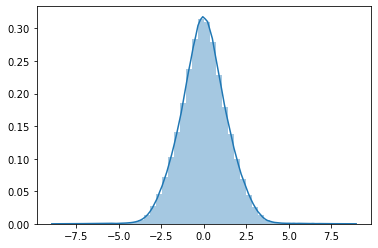

In [274]:
sns.distplot(residuals2)

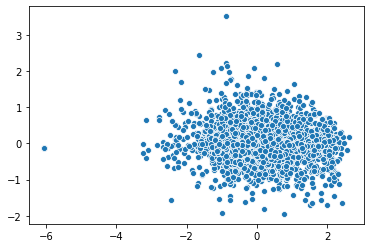

In [290]:
sns.scatterplot(a,residuals2)

In [ ]:
#hetroscedasticity removed

# trying with log y

In [299]:
import math

In [312]:
log_y=y_train.apply(lambda x:math.log(x))

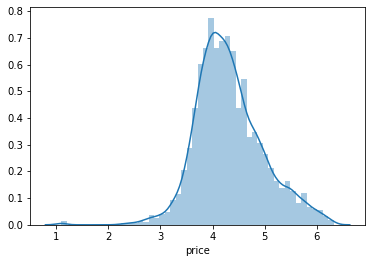

In [328]:
sns.distplot(log_y)

In [313]:
math.e**log_y

1765     204.00
226       72.00
8416      35.00
12546     65.00
1448      90.00
          ...  
12662     34.72
5499      99.00
5717     400.00
909      140.00
7704      90.00
Name: price, Length: 8433, dtype: float64

In [315]:
rfr_log=RandomForestRegressor(n_estimators=100)

In [316]:
rfr_log.fit(X_train_scaled,log_y)

RandomForestRegressor()

In [317]:
predictions2=rfr_log.predict(X_test_scaled)

In [319]:
predictions2

array([4.48436945, 4.63598415, 3.92823185, ..., 4.24970965, 3.08270075,
       4.45725668])

In [321]:
predictions_antilog=math.e**predictions2

In [322]:
mean_absolute_error(y_test,predictions_antilog)

21.144600439520644

In [323]:
r2_score(y_test,predictions_antilog)

0.717322369791999

In [324]:
residuals2=y_test-predictions_antilog

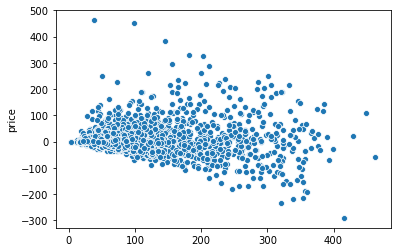

In [325]:
sns.scatterplot(predictions_antilog,residuals2)

In [333]:
#end 

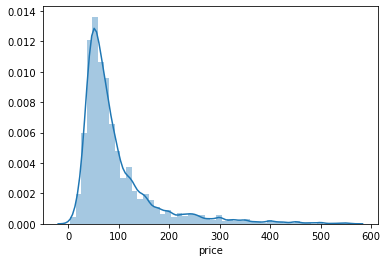

In [330]:
sns.distplot(y_train)

# treying scipy boxcox

In [346]:
from scipy.special import boxcox,inv_boxcox

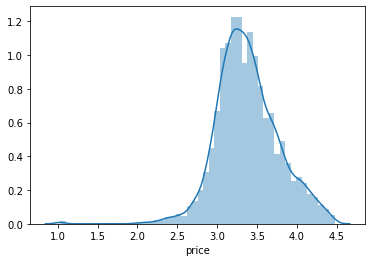

In [433]:
sns.distplot(boxcox(y_train,-0.1163197))

In [434]:
y_train_scipy=boxcox(y_train,-0.1163197)

In [435]:
rfr_scipy =RandomForestRegressor(n_estimators=100)

In [436]:
rfr_scipy.fit(X_train_scaled,y_train_scipy)

RandomForestRegressor()

In [437]:
predict_scipy=rfr_scipy.predict(X_test_scaled)

In [438]:
predict_scipy

array([3.50662808, 3.58930737, 3.15779068, ..., 3.31903576, 2.60057479,
       3.47736616])

In [439]:
inv_boxcox(predict_scipy,-0.1163197)

array([ 90.50138762, 104.18275481,  51.18936057, ...,  66.30354641,
        22.13296047,  86.14974124])

In [440]:
r2_score(y_test,inv_boxcox(predict_scipy,-0.1163197))

0.7230952789106067

In [441]:
resi=y_test-inv_boxcox(predict_scipy,-0.1163197)

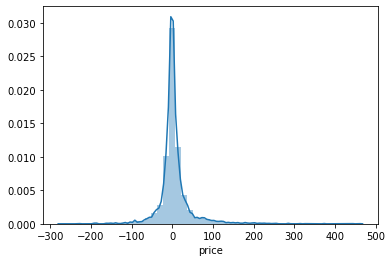

In [442]:
sns.distplot(resi)

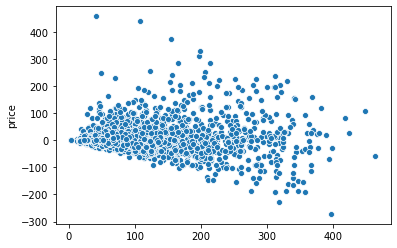

In [443]:
sns.scatterplot(inv_boxcox(predict_scipy,-0.1163197),resi)

In [412]:
from scipy.stats import boxcox_normmax


In [431]:
boxcox_normmax(y_train,brack=(-5,5),method='all')

array([-0.07877522, -0.1163197 ])

# using standrard normal distribution

In [459]:
standard_y_train=scaler.fit_transform(np.array(y_train).reshape(8433,1))

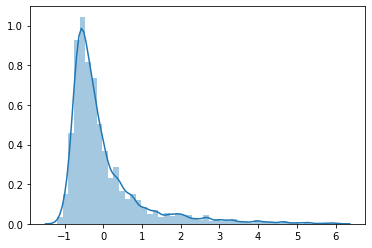

In [460]:
sns.distplot(standard_y_train)

In [461]:
rfr_standard=RandomForestRegressor(n_estimators=100)

In [463]:
rfr_standard.fit(X_train_scaled,standard_y_train)

C:\Users\vivji\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor()

In [465]:
predicted_standard= rfr_standard.predict(X_test_scaled)

In [481]:
predicted_standard

array([-0.03404811,  0.21771981, -0.58792998, ..., -0.46995499,
       -0.95129283, -0.10917867])

In [470]:
predicted_y=scaler.inverse_transform(predicted_standard)

In [471]:
r2_score(y_test,predicted_y)

0.7290353706077533

In [472]:
residuals_standard=y_test-predicted_y

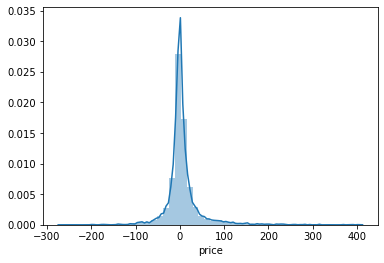

In [473]:
sns.distplot(residuals_standard)

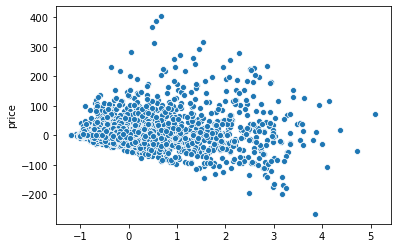

In [476]:
sns.scatterplot(predicted_standard,residuals_standard)

In [485]:
mean_absolute_error(y_test,predicted_y)

20.87010995867318

In [486]:
y_train.mean()

94.69520929681025

In [489]:
20.87010995867318/94.69520929681025*100

22.039245822096913

In [490]:
np.sqrt(mean_squared_error(y_test,predicted_y))

40.237830523110354

# testing on test.csv

In [520]:
test_data= pd.read_csv('Test.csv')

In [521]:
test_data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...
1475,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,NaN
1476,Super built-up Area,Ready To Move,Gottigere,3 BHK,NaN,1660,3.0,2.0,NaN
1477,Super built-up Area,Ready To Move,Channasandra,2 BHK,Unm 2El,1216,2.0,2.0,NaN
1478,Built-up Area,18-Feb,Tumkur Road,2 BHK,Sahtsva,996,2.0,1.0,NaN


In [522]:
test_data['availability']=test_data['availability'].apply(lambda x:x[3:6])

In [523]:
test_data['availability']=test_data['availability'].map({'Dec':12, 'dy ':0, 'May':5, 'Feb':2, 'Nov':11, 'Oct':10, 'Sep':9, 'Mar':3, 'Apr':4,
       'Aug':8, 'Jun':6, 'Jan':1, 'Jul':7, 'edi':0})

In [524]:
test_data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,0,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,0,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,4,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,0,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,0,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...
1475,Super built-up Area,0,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,NaN
1476,Super built-up Area,0,Gottigere,3 BHK,NaN,1660,3.0,2.0,NaN
1477,Super built-up Area,0,Channasandra,2 BHK,Unm 2El,1216,2.0,2.0,NaN
1478,Built-up Area,2,Tumkur Road,2 BHK,Sahtsva,996,2.0,1.0,NaN


In [525]:
test_data['size']=test_data['size'].apply(lambda x:str(x)[0:2])
test_data[test_data['size']=='na']='3'
test_data['size']=test_data['size'].apply(lambda x:float(x))

In [526]:
test_data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,0,Brookefield,2.0,Roeekbl,1225,2,2,NaN
1,Plot Area,0,Akshaya Nagar,9.0,NaN,2400,9,2,NaN
2,Plot Area,4,Hennur Road,4.0,Saandtt,1650,5,2,NaN
3,Super built-up Area,0,Kodichikkanahalli,3.0,Winerri,1322,3,1,NaN
4,Super built-up Area,0,Konanakunte,2.0,AmageSa,1161,2,1,NaN
...,...,...,...,...,...,...,...,...,...
1475,Super built-up Area,0,Vittasandra,2.0,Prlla C,1246,2,1,NaN
1476,Super built-up Area,0,Gottigere,3.0,NaN,1660,3,2,NaN
1477,Super built-up Area,0,Channasandra,2.0,Unm 2El,1216,2,2,NaN
1478,Built-up Area,2,Tumkur Road,2.0,Sahtsva,996,2,1,NaN


In [527]:
test_data['bath']=test_data['bath'].apply(lambda x:float(x))
test_data['balcony']=test_data['balcony'].apply(lambda x:float(x))

In [528]:
test_data['bath'].fillna(3.0,inplace=True)
test_data['balcony'].fillna(2.0,inplace=True)

In [529]:
test_data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,0,Brookefield,2.0,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,0,Akshaya Nagar,9.0,NaN,2400,9.0,2.0,NaN
2,Plot Area,4,Hennur Road,4.0,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,0,Kodichikkanahalli,3.0,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,0,Konanakunte,2.0,AmageSa,1161,2.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...
1475,Super built-up Area,0,Vittasandra,2.0,Prlla C,1246,2.0,1.0,NaN
1476,Super built-up Area,0,Gottigere,3.0,NaN,1660,3.0,2.0,NaN
1477,Super built-up Area,0,Channasandra,2.0,Unm 2El,1216,2.0,2.0,NaN
1478,Built-up Area,2,Tumkur Road,2.0,Sahtsva,996,2.0,1.0,NaN


In [530]:
test_data['location'].fillna('unknown',inplace=True)
test_data['society'].fillna('unknown',inplace=True)

In [531]:
test_data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,0,Brookefield,2.0,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,0,Akshaya Nagar,9.0,unknown,2400,9.0,2.0,NaN
2,Plot Area,4,Hennur Road,4.0,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,0,Kodichikkanahalli,3.0,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,0,Konanakunte,2.0,AmageSa,1161,2.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...
1475,Super built-up Area,0,Vittasandra,2.0,Prlla C,1246,2.0,1.0,NaN
1476,Super built-up Area,0,Gottigere,3.0,unknown,1660,3.0,2.0,NaN
1477,Super built-up Area,0,Channasandra,2.0,Unm 2El,1216,2.0,2.0,NaN
1478,Built-up Area,2,Tumkur Road,2.0,Sahtsva,996,2.0,1.0,NaN


In [532]:
test_data['total_sqft']=test_data['total_sqft'].apply(lambda x:x[0:4])
alphanum_test=1-test_data['total_sqft'].apply(lambda x:x.isdecimal())
alpha_index_test=alphanum_test[alphanum_test==1].index
test_data.drop(alpha_index_test,inplace=True)
test_data['total_sqft']=test_data['total_sqft'].apply(lambda x:float(x))

In [533]:
test_data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,0,Brookefield,2.0,Roeekbl,1225.0,2.0,2.0,NaN
1,Plot Area,0,Akshaya Nagar,9.0,unknown,2400.0,9.0,2.0,NaN
2,Plot Area,4,Hennur Road,4.0,Saandtt,1650.0,5.0,2.0,NaN
3,Super built-up Area,0,Kodichikkanahalli,3.0,Winerri,1322.0,3.0,1.0,NaN
4,Super built-up Area,0,Konanakunte,2.0,AmageSa,1161.0,2.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...
1475,Super built-up Area,0,Vittasandra,2.0,Prlla C,1246.0,2.0,1.0,NaN
1476,Super built-up Area,0,Gottigere,3.0,unknown,1660.0,3.0,2.0,NaN
1477,Super built-up Area,0,Channasandra,2.0,Unm 2El,1216.0,2.0,2.0,NaN
1478,Built-up Area,2,Tumkur Road,2.0,Sahtsva,996.0,2.0,1.0,NaN


In [534]:
test_data.drop('price',axis=1,inplace=True)

In [535]:
test_data

,area_type,availability,location,size,society,total_sqft,bath,balcony
0,Super built-up Area,0,Brookefield,2.0,Roeekbl,1225.0,2.0,2.0
1,Plot Area,0,Akshaya Nagar,9.0,unknown,2400.0,9.0,2.0
2,Plot Area,4,Hennur Road,4.0,Saandtt,1650.0,5.0,2.0
3,Super built-up Area,0,Kodichikkanahalli,3.0,Winerri,1322.0,3.0,1.0
4,Super built-up Area,0,Konanakunte,2.0,AmageSa,1161.0,2.0,1.0
...,...,...,...,...,...,...,...,...
1475,Super built-up Area,0,Vittasandra,2.0,Prlla C,1246.0,2.0,1.0
1476,Super built-up Area,0,Gottigere,3.0,unknown,1660.0,3.0,2.0
1477,Super built-up Area,0,Channasandra,2.0,Unm 2El,1216.0,2.0,2.0
1478,Built-up Area,2,Tumkur Road,2.0,Sahtsva,996.0,2.0,1.0


In [544]:
test_data_dummy=pd.get_dummies(test_data,prefix_sep="@",columns=['area_type','location','society'])

In [545]:
test_data_dummy

,availability,size,total_sqft,bath,balcony,area_type@3,area_type@Built-up Area,area_type@Carpet Area,area_type@Plot Area,area_type@Super built-up Area,...,society@Veodsar,society@ViisePa,society@ViistLa,society@Vrenty,society@Winerri,society@Wisic C,society@Xeitaa,society@YMarlti,society@i1rtsCo,society@unknown
0,0,2.0,1225.0,2.0,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,9.0,2400.0,9.0,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,4,4.0,1650.0,5.0,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3.0,1322.0,3.0,1.0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2.0,1161.0,2.0,1.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,0,2.0,1246.0,2.0,1.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1476,0,3.0,1660.0,3.0,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1477,0,2.0,1216.0,2.0,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1478,2,2.0,996.0,2.0,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [538]:
cols=list(X_train.columns)

In [539]:
cols

['availability',
 'size',
 'total_sqft',
 'bath',
 'balcony',
 'area_type@3',
 'area_type@Built-up  Area',
 'area_type@Carpet  Area',
 'area_type@Plot  Area',
 'area_type@Super built-up  Area',
 'location@ Anekal',
 'location@ Banaswadi',
 'location@ Basavangudi',
 'location@ Bhoganhalli',
 'location@ Devarabeesana Halli',
 'location@ Devarachikkanahalli',
 'location@ Electronic City',
 'location@ Mysore Highway',
 'location@ Rachenahalli',
 'location@ Thanisandra',
 'location@ Whitefield',
 'location@ ittamadu',
 'location@ south',
 'location@12th cross srinivas nagar banshankari 3rd stage',
 'location@1st Block BEL Layout',
 'location@1st Block HBR Layout',
 'location@1st Block HRBR Layout',
 'location@1st Block Jayanagar',
 'location@1st Block Koramangala',
 'location@1st Phase JP Nagar',
 'location@1st Stage Domlur',
 'location@1st Stage Indira Nagar',
 'location@1st Stage Radha Krishna Layout',
 'location@2nd Block Bel Layout',
 'location@2nd Block Hbr Layout',
 'location@2nd Bloc

In [540]:
cols.pop(0)
cols.pop(0)
cols.pop(0)
cols.pop(0)
cols.pop(0)

'balcony'

In [546]:
cols

['area_type@3',
 'area_type@Built-up  Area',
 'area_type@Carpet  Area',
 'area_type@Plot  Area',
 'area_type@Super built-up  Area',
 'location@ Anekal',
 'location@ Banaswadi',
 'location@ Basavangudi',
 'location@ Bhoganhalli',
 'location@ Devarabeesana Halli',
 'location@ Devarachikkanahalli',
 'location@ Electronic City',
 'location@ Mysore Highway',
 'location@ Rachenahalli',
 'location@ Thanisandra',
 'location@ Whitefield',
 'location@ ittamadu',
 'location@ south',
 'location@12th cross srinivas nagar banshankari 3rd stage',
 'location@1st Block BEL Layout',
 'location@1st Block HBR Layout',
 'location@1st Block HRBR Layout',
 'location@1st Block Jayanagar',
 'location@1st Block Koramangala',
 'location@1st Phase JP Nagar',
 'location@1st Stage Domlur',
 'location@1st Stage Indira Nagar',
 'location@1st Stage Radha Krishna Layout',
 'location@2nd Block Bel Layout',
 'location@2nd Block Hbr Layout',
 'location@2nd Block Hrbr Layout',
 'location@2nd Block Jayanagar',
 'location@2n

In [547]:
for col in test_data_dummy.columns:
    if col not in cols and "@" in col:
        test_data_dummy.drop(col, axis=1, inplace=True)
        print('dropped feature',col)
        # no new categories added

dropped feature location@ Hoodi
dropped feature location@ Kanakpura Road
dropped feature location@#NAME?
dropped feature location@15th Block Hbr Layout
dropped feature location@Aga Abbas Ali Road
dropped feature location@BSK STAGE 2
dropped feature location@Bellandur ORR
dropped feature location@C P Cassia Apartment,
dropped feature location@Chikkasanne
dropped feature location@Chinnapa Garden
dropped feature location@East Colony
dropped feature location@Hanuma Reddy Layout
dropped feature location@Inasappa Layout
dropped feature location@J.P.Nagar 6th Phase , sarakki nagar
dropped feature location@JP nagar 9th phase , 
dropped feature location@KAS Officers Colony
dropped feature location@Kalidasa Layout
dropped feature location@Kathreguppe
dropped feature location@Kauser Nagar
dropped feature location@Kengeri Satellite Town Stage 1
dropped feature location@Koppa village
dropped feature location@Koramangala Industrial Layout
dropped feature location@Kurudusonnenahalli
dropped feature l

In [550]:
test_data_dummy

,availability,size,total_sqft,bath,balcony,area_type@3,area_type@Built-up Area,area_type@Carpet Area,area_type@Plot Area,area_type@Super built-up Area,...,society@Vasta C,society@Vayali,society@Veales,society@Veodsar,society@ViisePa,society@ViistLa,society@Vrenty,society@Xeitaa,society@i1rtsCo,society@unknown
0,0,2.0,1225.0,2.0,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,9.0,2400.0,9.0,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,4,4.0,1650.0,5.0,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3.0,1322.0,3.0,1.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,2.0,1161.0,2.0,1.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,0,2.0,1246.0,2.0,1.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1476,0,3.0,1660.0,3.0,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1477,0,2.0,1216.0,2.0,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1478,2,2.0,996.0,2.0,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [552]:
for col in cols:
    if col not in test_data_dummy.columns:
        test_data_dummy[col] = 0

In [553]:
test_data_dummy

,availability,size,total_sqft,bath,balcony,area_type@3,area_type@Built-up Area,area_type@Carpet Area,area_type@Plot Area,area_type@Super built-up Area,...,society@WishiVa,society@WoarkEm,society@YCnce R,society@YMhenLi,society@Yaenti,society@ZeodsWo,society@Zonce E,society@Zostaa,society@i1ncyRe,society@i1odsne
0,0,2.0,1225.0,2.0,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,9.0,2400.0,9.0,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4,4.0,1650.0,5.0,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3.0,1322.0,3.0,1.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,2.0,1161.0,2.0,1.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,0,2.0,1246.0,2.0,1.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1476,0,3.0,1660.0,3.0,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1477,0,2.0,1216.0,2.0,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1478,2,2.0,996.0,2.0,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [554]:
X_train

,availability,size,total_sqft,bath,balcony,area_type@3,area_type@Built-up Area,area_type@Carpet Area,area_type@Plot Area,area_type@Super built-up Area,...,society@YCnce R,society@YMhenLi,society@Yaenti,society@ZeodsWo,society@Zonce E,society@Zostaa,society@i1ncyRe,society@i1odsne,society@i1rtsCo,society@unknown
1765,12,4.0,2695.0,3.0,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
226,0,2.0,1080.0,2.0,2.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8416,0,2.0,935.0,2.0,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
12546,0,3.0,1382.0,3.0,1.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1448,0,5.0,900.0,4.0,0.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12662,12,2.0,1052.0,2.0,1.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5499,0,5.0,2000.0,4.0,1.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5717,5,4.0,3405.0,6.0,3.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
909,4,3.0,2238.0,3.0,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [561]:
final_predict=rfr.predict(test_data_dummy)

In [572]:
house= pd.read_csv('Test.csv')

In [573]:
house['price']=np.around(final_predict,2)

ValueError: Length of values does not match length of index

In [571]:
test_data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,0,Brookefield,2.0,Roeekbl,1225.0,2.0,2.0,54.76
1,Plot Area,0,Akshaya Nagar,9.0,unknown,2400.0,9.0,2.0,245.67
2,Plot Area,4,Hennur Road,4.0,Saandtt,1650.0,5.0,2.0,206.35
3,Super built-up Area,0,Kodichikkanahalli,3.0,Winerri,1322.0,3.0,1.0,59.09
4,Super built-up Area,0,Konanakunte,2.0,AmageSa,1161.0,2.0,1.0,51.81
...,...,...,...,...,...,...,...,...,...
1475,Super built-up Area,0,Vittasandra,2.0,Prlla C,1246.0,2.0,1.0,62.53
1476,Super built-up Area,0,Gottigere,3.0,unknown,1660.0,3.0,2.0,86.61
1477,Super built-up Area,0,Channasandra,2.0,Unm 2El,1216.0,2.0,2.0,57.46
1478,Built-up Area,2,Tumkur Road,2.0,Sahtsva,996.0,2.0,1.0,43.79
